In [1]:
# Imports

import pandas as pd
import numpy as np
from model.model import RecommenderSystemModel
from utils import *
from data.results import Results
import warnings
import os
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Data Analysis

In [2]:
# Get dataframes 

dfs_results_benchmark = []
dfs_results_covert = []
dfs_results_overt = []
dfs_results_overt_w_si = []
dfs_users_benchmark = []
dfs_users_covert = []
dfs_users_overt = []
dfs_users_overt_w_si = []

base_path = "data/results"
runs = sorted(os.listdir(base_path))
i = 1
for run in runs:
    full_path = os.path.join(base_path, run)
    if os.path.isdir(full_path):
        if i <= 20:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="benchmark")
            dfs_results_benchmark.append(df_results)
            dfs_users_benchmark.append(df_users) 
        elif i <= 40:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="covert")
            dfs_results_covert.append(df_results)
            dfs_users_covert.append(df_users) 
        elif i <= 60:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="overt")
            dfs_results_overt.append(df_results)
            dfs_users_overt.append(df_users) 
        else:
            df_results, df_users = load_results_dfs(path=full_path, i=i, model="overt_w_si")
            dfs_results_overt_w_si.append(df_results)
            dfs_users_overt_w_si.append(df_users) 
        print(f"Processed Dataframe {i}/80", end="\r")
        i += 1        

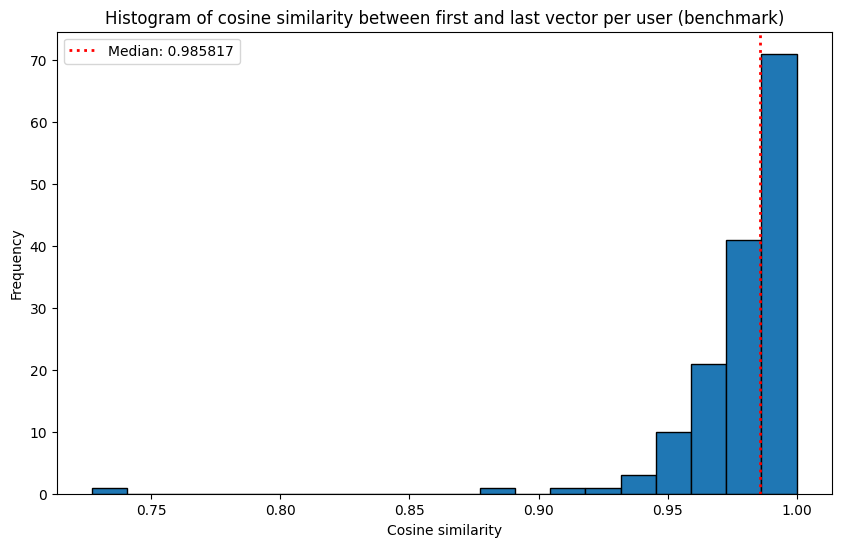

In [3]:
# Plot vector differences for benchmark model

df_results_benchmark = pd.concat(dfs_results_benchmark)
df_results_benchmark_filtered = df_results_benchmark.groupby(["AgentID"]).vector_diff.mean().reset_index()
plot_vector_diffs(df=df_results_benchmark_filtered, model="benchmark")

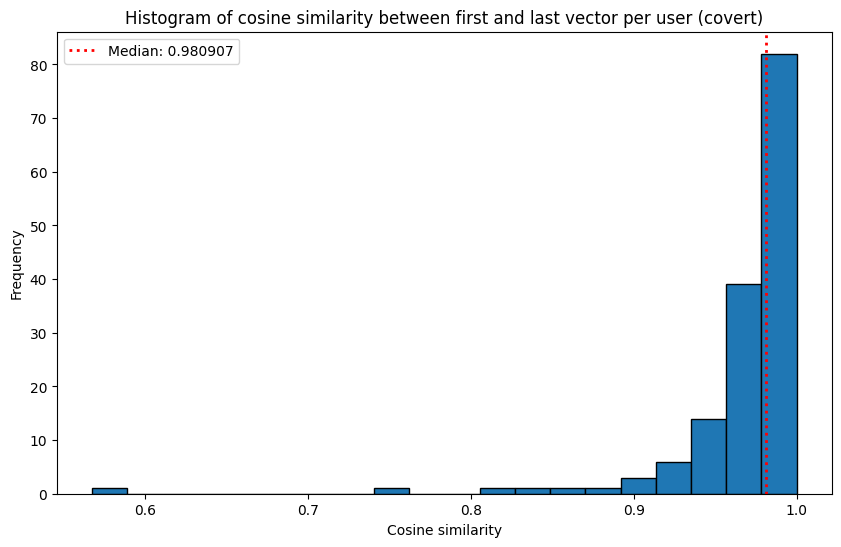

In [4]:
# Plot vector differences for covert model

df_results_covert = pd.concat(dfs_results_covert)
df_results_covert_filtered = df_results_covert.groupby(["AgentID"]).vector_diff.mean().reset_index()
plot_vector_diffs(df=df_results_covert_filtered, model="covert")

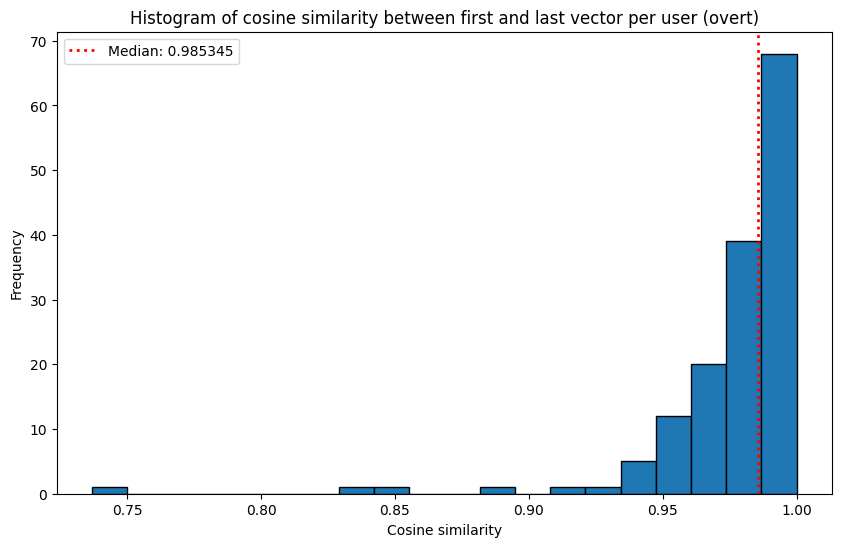

In [5]:
# Plot vector differences for overt model

df_results_overt = pd.concat(dfs_results_overt)
df_results_overt_filtered = df_results_overt.groupby(["AgentID"]).vector_diff.mean().reset_index()
plot_vector_diffs(df=df_results_overt_filtered, model="overt")

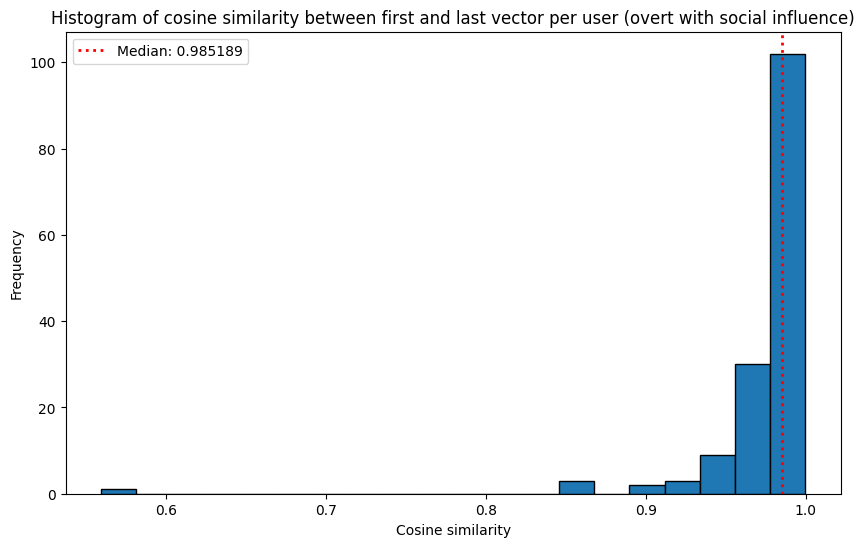

In [6]:
# Plot vector differences for overt with social influence model

df_results_overt_w_si = pd.concat(dfs_results_overt_w_si)
df_results_overt_w_si_filtered = df_results_overt_w_si.groupby(["AgentID"]).vector_diff.mean().reset_index()
plot_vector_diffs(df=df_results_overt_w_si_filtered, model="overt with social influence")